In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install bnlp_toolkit
!pip install bnltk
!pip install -U bnlp_toolkit



  Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
Using cached numpy-2.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlp-toolkit 4.0.3 requir

In [ ]:
#Import libraries for data cleanning

import re
from bnltk.stemmer import BanglaStemmer
import pandas as pd

In [ ]:
df_1 = pd.read_excel("/content/drive/MyDrive/Thesis/DataSet-1/dataset-1.xlsx")
df_2 = pd.read_excel("/content/drive/MyDrive/Thesis/DataSet-1/dataset-2.xlsx")

In [ ]:
# prompt: now concatenate df_1 and df_2 and then save them on a new variable df

df = pd.concat([df_1, df_2], ignore_index=True)
print(df.shape)

(20436, 2)


In [ ]:

# Spliting 60% for training, 20% for testing and 20% for validation

# Calculate the split indices
train_split = int(0.6 * len(df))
val_split = int(0.8 * len(df))

# Split the DataFrame
df_train = df[:train_split]
df_test = df[train_split:val_split]
df_val = df[val_split:]

# Print the shapes of the resulting DataFrames to verify
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)
print("Shape of df_val:", df_val.shape)


Shape of df_train: (12261, 2)
Shape of df_test: (4087, 2)
Shape of df_val: (4088, 2)


>**Data cleaning and preprocessing**


In [ ]:
from bnlp import CleanText

In [ ]:

# from bnlp import CleanText
#Preprocessing Part Starts
clean_text_processor = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=True,
   remove_email=True,
   remove_emoji=True,
   remove_number=True,
   remove_digits=True,
   remove_punct=True,
   replace_with_url="",
   replace_with_email="",
   replace_with_number="",
   replace_with_digit="",
   replace_with_punct = ""
)

# Testing
# input_text = "আমার সোনার বাংলা <html/>"
# clean_text = clean_text_processor(input_text)
# print(clean_text)

df_train['Text'] = df_train['Text'].apply(lambda x: clean_text_processor(x))
df_test['Text'] = df_test['Text'].apply(lambda x: clean_text_processor(x))
df_val['Text'] = df_val['Text'].apply(lambda x: clean_text_processor(x))

In [ ]:
import re

In [ ]:
# Removing english words and numbers and then removing extra spcaes
def remove_extra_spaces_and_english(text):
  # Remove English words and numbers
  text = re.sub(r'[a-zA-Z0-9]', '', text)

  # Remove extra whitespace characters
  text = re.sub(r'\s+', ' ', text).strip()

  return text


# Example usage (assuming df_train, df_test, and df_val are defined):
df_train['Text'] = df_train['Text'].apply(remove_extra_spaces_and_english)
df_test['Text'] = df_test['Text'].apply(remove_extra_spaces_and_english)
df_val['Text'] = df_val['Text'].apply(remove_extra_spaces_and_english)


In [ ]:
#Check if there are any empty cells

def check_empty_text(df):
  return df['Text'].isnull().any()

def check_empty_label(df):
  return df['Label'].isnull().any()
print(check_empty_text(df_train))
print(check_empty_label(df_train))


False
False


In [ ]:
# For Deleteing rows with empty cells

def drop_empty_rows(df):
    # Drop rows where 'Text' or 'Label' is empty
    df.dropna(subset=['Text', 'Label'], inplace=True)
    return df

df_train = drop_empty_rows(df_train)
df_test = drop_empty_rows(df_test)
df_val = drop_empty_rows(df_val)

print(check_empty_text(df_train))
print(check_empty_label(df_train))


False
False


In [ ]:
#Checking if there are any sentences with single word in Text Field

def check_single_word_cells(df):
  for index, row in df.iterrows():
    text = row['Text']
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()
        if len(words) == 1 and words[0] != '': #check for empty string after spliting
          return True
  return False

print(check_single_word_cells(df_train))
print(check_single_word_cells(df_test))
print(check_single_word_cells(df_val))


True
True
False


In [ ]:
# Stemmer
from bnltk.stemmer import BanglaStemmer
bn_stemmer = BanglaStemmer()
def stem_bengali_text(text):
    return [bn_stemmer.stem(word) for word in text]

df_train['Text'] = df_train['Text'].apply(lambda x: ' '.join(stem_bengali_text(x.split())))
df_test['Text'] = df_test['Text'].apply(lambda x: ' '.join(stem_bengali_text(x.split())))
df_val['Text'] = df_val['Text'].apply(lambda x: ' '.join(stem_bengali_text(x.split())))

print(df_train.head())
print(df_test.head())
print(df_val.head())

                                                Text     Label
0  এ নাটক হ সাল কিন্তু তখন ইউটিউব ছিলোনা ইউটিউব আ...       joy
1  সাল যা কোথা কেউ নে দেখ আস তা রুচির প্রশংসা না ...  surprise
2       বাংলাদেশ ইতিহাস সর্বশ্রেষ্ঠ নাটক কোথা কেউ নে       joy
3  এ সুন্দর নাটক আগ কখনো দেখা হয় না সাল দেখলাম ব...       joy
4  কখনো চিন্তা করিনি জন্ম বছর আগ নাটক দেখবো তা আব...  surprise
                                                    Text     Label
12261  আদালত অবমাননা কর সাহস এ কোথায় পায় আপনা এগিয়...  surprise
12262                                    রাইট কথা বলছ ভা       joy
12263                                         ধন্যবাদ ভা       joy
12264  আমা দাশা হাজ হাজ যুবক ডিগ্রীধারী বেক এ সব চোর ...       joy
12265  শনিব এক যাত্রীর মানিব্যাগ থাকা বিমানবন্দর সিকি...   sadness
                                                    Text     Label
16348  একটু দয়ামায়া কর কত কষ্ট নিয় হাসিনা নামটুকু ...   sadness
16349  একটু পর ঘড় থাকা এক মেয় ব হল তা দেখে আম বুক ব...  surprise
16350  একটু প্লেস ক

In [ ]:
from bnlp import BengaliCorpus as corpus
#Remove stop words
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in corpus.stopwords]
    return " ".join(filtered_words)

df_train['Text'] = df_train['Text'].apply(remove_stopwords)
df_test['Text'] = df_test['Text'].apply(remove_stopwords)
df_val['Text'] = df_val['Text'].apply(remove_stopwords)





In [ ]:
#Check find those texts which are similiar but different in emotion
def find_similar_rows_different_labels(df):


  # Group by 'Text' and check if there are multiple labels for the same text.
  for text, group in df.groupby('Text'):
    if len(group['Label'].unique()) > 1:
      print(f"Similar text '{text}' with different Emotion:")
      print(group[['Text', 'Label']])
      print("-" * 20)

find_similar_rows_different_labels(df_train)
print("------------------")
find_similar_rows_different_labels(df_test)
print("--------------------")
find_similar_rows_different_labels(df_val)


Similar text '' with different Emotion:
      Text     Label
1209         disgust
9525         sadness
9702        surprise
9786             joy
9787         sadness
9788             joy
9996             joy
10630        sadness
11451       surprise
11529            joy
11563            joy
12039        sadness
--------------------
Similar text 'অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান অপরাধী এাো বল মোনাফেক কাফ জারজ নাস্তিক আস্তিক মালউন আরো বল' with different Emotion:
                                                   Text    Label
8260  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...    anger
8299  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...  sadness
8363  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...  disgust
8563  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...  sadness
8564  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...  sadness
8565  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...  sadness
8566  অপরাধ কারী অপরাধী প্রশ্রয় দানকারী দুজনে সমান ...  sadness
8

In [ ]:
# #Deleting those rows which are similiar in Text columns and different in Label columns

def remove_conflicting_rows(df):
    """Removes rows with identical 'Text' but different 'Label' values."""

    # Group by 'Text' and get unique labels for each group
    grouped = df.groupby('Text')['Label'].unique()

    # Find texts with more than one unique label
    conflicting_texts = grouped[grouped.apply(len) > 1].index

    # Filter out rows with conflicting texts
    df_filtered = df[~df['Text'].isin(conflicting_texts)]

    return df_filtered

df_train = remove_conflicting_rows(df_train)
df_test = remove_conflicting_rows(df_test)
df_val = remove_conflicting_rows(df_val)


In [ ]:
#Checking
find_similar_rows_different_labels(df_train)
print("------------------")
find_similar_rows_different_labels(df_test)
print("--------------------")
find_similar_rows_different_labels(df_val)

------------------
--------------------


In [ ]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(12041, 2)
(4060, 2)
(4047, 2)


> Machine Learning Models (Logistic Regression, Decision Tree, SVM, Random Forest)



In [ ]:
#Preprocess text
X_train = df_train['Text'].values
y_train = df_train['Label'].values

X_test = df_test['Text'].values
y_test = df_test['Label'].values

X_val = df_val['Text'].values
y_val = df_val['Label'].values


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#For showing confusiong matrix and performance chart
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support


In [ ]:
def train_model(model, data, targets):
    """
    Train a model on the given data and targets.

    Parameters:
    model (sklearn model): The model to be trained.
    data (list of str): The input data.
    targets (list of str): The targets.

    Returns:
    Pipeline: The trained model as a Pipeline object.
    """
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [ ]:
def get_F1(trained_model,X,y):
    """
    Get the F1 score for the given model on the given data and targets.

    Parameters:
    trained_model (sklearn model): The trained model.
    X (list of str): The input data.
    y (list of str): The targets.

    Returns:
    array: The F1 score for each class.
    """
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

In [ ]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [ ]:
#Make a single prediction
y_pred=log_reg.predict(['খারাপ'])
y_pred

array(['anger'], dtype=object)

#1. Logistic Regression

In [ ]:
#test the model with the test data
y_pred=log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.5261083743842364 



,F1 score
joy,0.441060
surprise,0.389927
sadness,0.656716
disgust,0.665946
fear,0.426184
anger,0.477876


Accuracy:  0.5261083743842364 

              precision    recall  f1-score   support

       anger       0.37      0.54      0.44       620
     disgust       0.53      0.31      0.39       775
        fear       0.79      0.56      0.66       353
         joy       0.66      0.67      0.67      1385
     sadness       0.36      0.51      0.43       596
    surprise       0.58      0.41      0.48       331

    accuracy                           0.53      4060
   macro avg       0.55      0.50      0.51      4060
weighted avg       0.55      0.53      0.53      4060

          Precision     Recall   F1 Score
anger     37.415730  53.709677  44.105960
disgust   52.631579  30.967742  38.992689
fear      79.200000  56.090652  65.671642
joy       66.474820  66.714801  66.594595
sadness   36.428571  51.342282  42.618384
surprise  57.692308  40.785498  47.787611


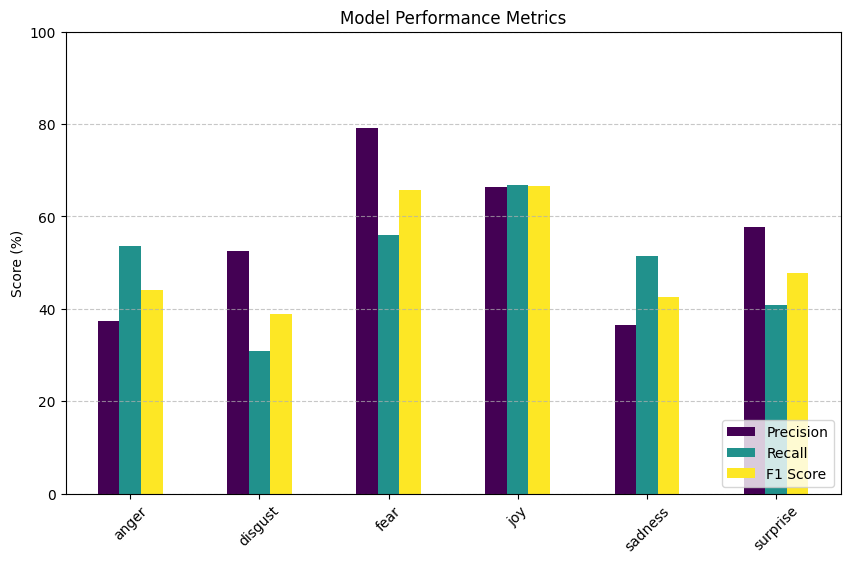

In [ ]:
# Predict using the model
y_pred = log_reg.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy, '\n')

# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

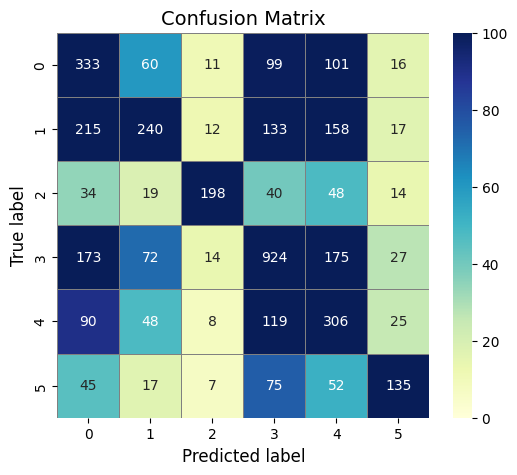

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()


#2. Decision Tree

In [ ]:
#Train the model with the training data
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

# #calculate the F1 score
# f1_Score = get_F1(DT,X_test,y_test)
# pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.7891625615763547 



              precision    recall  f1-score   support

       anger       0.65      0.87      0.74       620
     disgust       0.82      0.80      0.81       775
        fear       0.85      0.88      0.87       353
         joy       0.88      0.73      0.80      1385
     sadness       0.74      0.78      0.76       596
    surprise       0.77      0.80      0.79       331

    accuracy                           0.79      4060
   macro avg       0.79      0.81      0.79      4060
weighted avg       0.80      0.79      0.79      4060

          Precision     Recall   F1 Score
anger     64.620939  86.612903  74.017919
disgust   82.047872  79.612903  80.812050
fear      85.013624  88.385269  86.666667
joy       88.421053  72.779783  79.841584
sadness   74.044586  78.020134  75.980392
surprise  77.485380  80.060423  78.751857


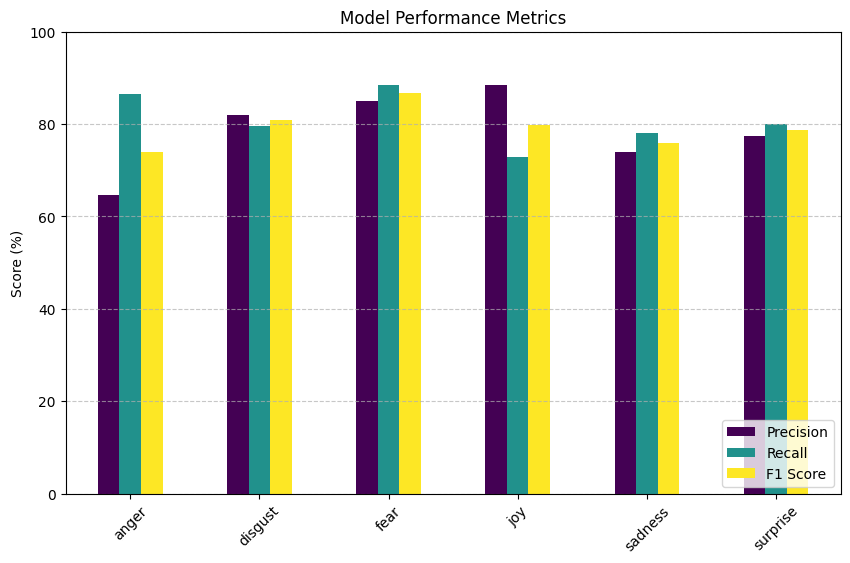

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

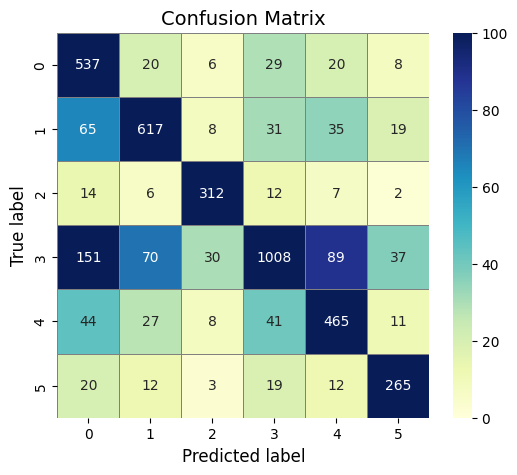

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()

# 3. SVM

In [ ]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
# f1_Score = get_F1(SVM,X_test,y_test)
# pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.7086206896551724 



              precision    recall  f1-score   support

       anger       0.55      0.76      0.64       620
     disgust       0.76      0.62      0.68       775
        fear       0.91      0.74      0.82       353
         joy       0.82      0.74      0.78      1385
     sadness       0.56      0.74      0.64       596
    surprise       0.84      0.59      0.69       331

    accuracy                           0.71      4060
   macro avg       0.74      0.70      0.71      4060
weighted avg       0.74      0.71      0.71      4060

          Precision     Recall   F1 Score
anger     54.756381  76.129032  63.697706
disgust   76.031746  61.806452  68.185053
fear      91.228070  73.654391  81.504702
joy       81.796502  74.296029  77.866061
sadness   55.752212  73.993289  63.590483
surprise  83.760684  59.214502  69.380531


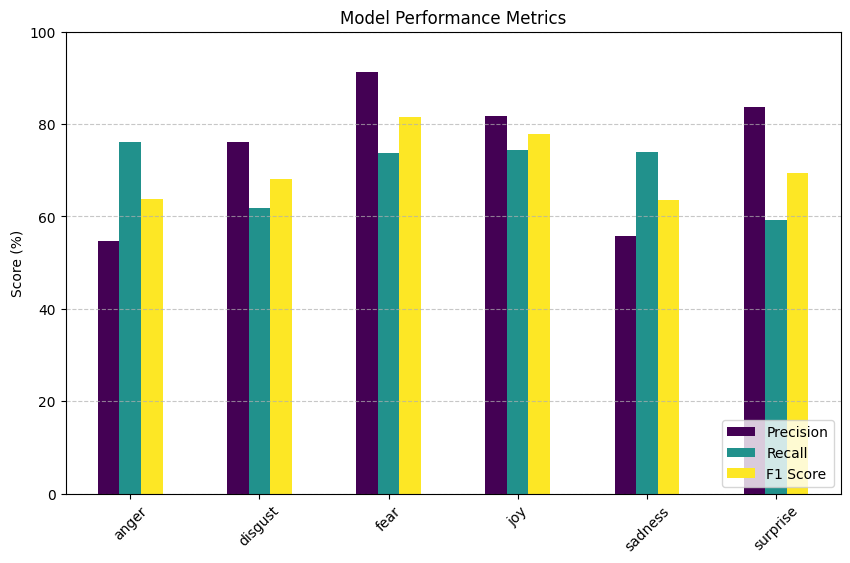

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

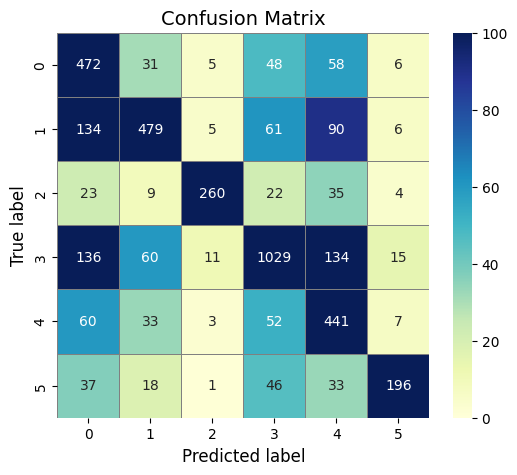

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()

# Random Forest

In [ ]:
#Train the model with the training data
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
# f1_Score = get_F1(RF, X_test, y_test)
# pd.DataFrame(f1_Score, index=df_train.Label.unique(), columns=['F1 score'])

Accuracy:  0.8044334975369458 



              precision    recall  f1-score   support

       anger       0.66      0.86      0.74       620
     disgust       0.86      0.78      0.82       775
        fear       0.95      0.89      0.92       353
         joy       0.88      0.78      0.82      1385
     sadness       0.69      0.79      0.74       596
    surprise       0.87      0.79      0.83       331

    accuracy                           0.80      4060
   macro avg       0.82      0.82      0.81      4060
weighted avg       0.82      0.80      0.81      4060

          Precision     Recall   F1 Score
anger     65.717822  85.645161  74.369748
disgust   86.099291  78.322581  82.027027
fear      94.578313  88.951841  91.678832
joy       87.520259  77.978339  82.474227
sadness   69.264706  79.026846  73.824451
surprise  87.375415  79.456193  83.227848


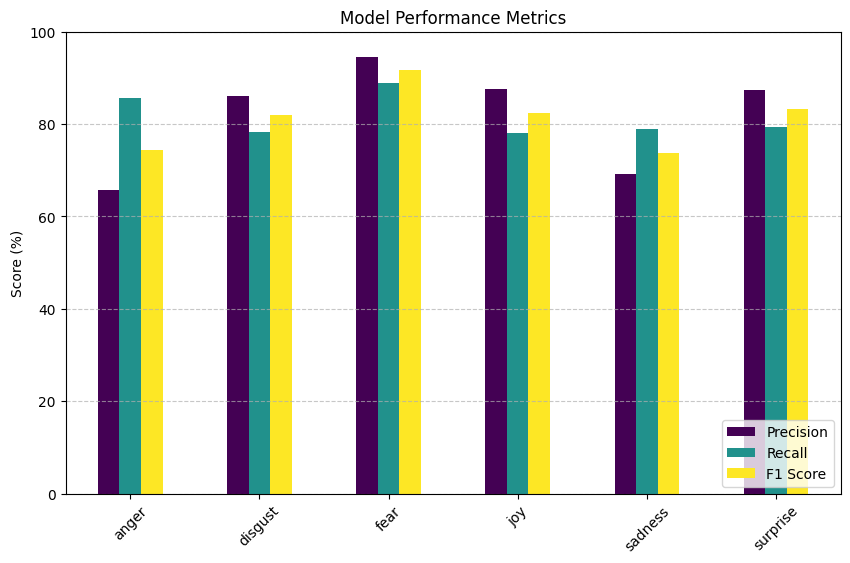

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
labels = sorted(set(y_test))  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()

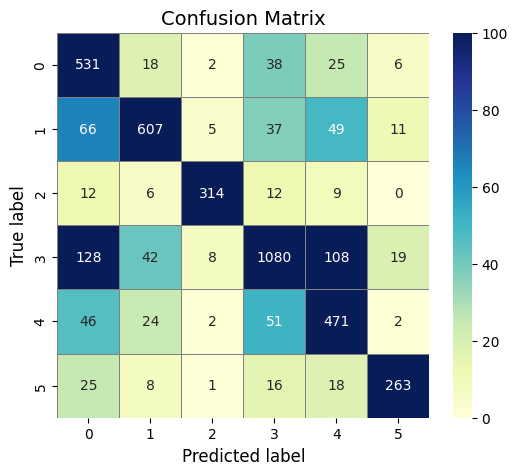

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with the desired style
sns.heatmap(cm, annot=True, fmt="g", cmap="YlGnBu", linewidths=0.5, linecolor='gray', vmin=0, vmax=100)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted label", fontsize=12)
plt.ylabel("True label", fontsize=12)

# Show plot
plt.show()

# All ML Performance Table

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy, DT_accuracy, SVM_accuracy, RF_accuracy]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Random Forest,0.804433
1,Decision Tree,0.789163
2,Support Vector Machine,0.708621
3,Logistic Regression,0.526108


# Deep Learning Models


**CNN With additional reuglarization**





In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Tokenization
vocab_size = 5000  # Keeping it optimal
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

df_train['Text'] = df_train['Text'].str.lower()  # Normalize case
df_test['Text'] = df_test['Text'].str.lower()
df_val['Text'] = df_val['Text'].str.lower()

tokenizer.fit_on_texts(df_train['Text'])

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(df_train['Text'])
test_sequences = tokenizer.texts_to_sequences(df_test['Text'])
val_sequences = tokenizer.texts_to_sequences(df_val['Text'])

# Padding sequences
X_train = pad_sequences(train_sequences, maxlen=max_length, padding='post')
X_test = pad_sequences(test_sequences, maxlen=max_length, padding='post')
X_val = pad_sequences(val_sequences, maxlen=max_length, padding='post')

# Label Encoding
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(df_train['Label'])
y_test = label_encoder.transform(df_test['Label'])
y_val = label_encoder.transform(df_val['Label'])

num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

# CNN Model with Additional Regularization
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),  # Helps with training stability
    GlobalMaxPooling1D(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),  # L2 Regularization
    Dropout(0.5),  # Prevent overfitting
    Dense(num_classes, activation='softmax')
])

# Compile with Learning Rate Scheduling
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Added early stopping
)

# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate F1-score table
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
f1_df = pd.DataFrame(report).transpose()
print(f1_df)


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.2575 - loss: 3.1277 - val_accuracy: 0.4910 - val_loss: 2.2567
Epoch 2/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5167 - loss: 1.7864 - val_accuracy: 0.8626 - val_loss: 1.0714
Epoch 3/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7207 - loss: 1.0929 - val_accuracy: 0.9607 - val_loss: 0.4737
Epoch 4/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8669 - loss: 0.6393 - val_accuracy: 0.9926 - val_loss: 0.2509
Epoch 5/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9434 - loss: 0.3829 - val_accuracy: 0.9975 - val_loss: 0.1825
Epoch 6/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.2602 - val_accuracy: 0.9998 - val_loss: 0.1337
Epoch 7/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.1940 - val_accuracy: 0.9993 - val_loss: 0.1055
Epoch 8/30
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.1494 - val_accuracy: 0.

              precision    recall  f1-score   support

       anger       0.83      0.88      0.85       620
     disgust       0.84      0.85      0.85       775
        fear       0.89      0.89      0.89       353
         joy       0.93      0.83      0.88      1385
     sadness       0.73      0.84      0.79       596
    surprise       0.79      0.83      0.81       331

    accuracy                           0.85      4060
   macro avg       0.84      0.85      0.84      4060
weighted avg       0.85      0.85      0.85      4060

          Precision     Recall   F1 Score
anger     82.978723  88.064516  85.446009
disgust   83.989835  85.290323  84.635083
fear      89.488636  89.235127  89.361702
joy       93.013810  82.671480  87.538226
sadness   73.430657  84.395973  78.532397
surprise  79.250720  83.081571  81.120944


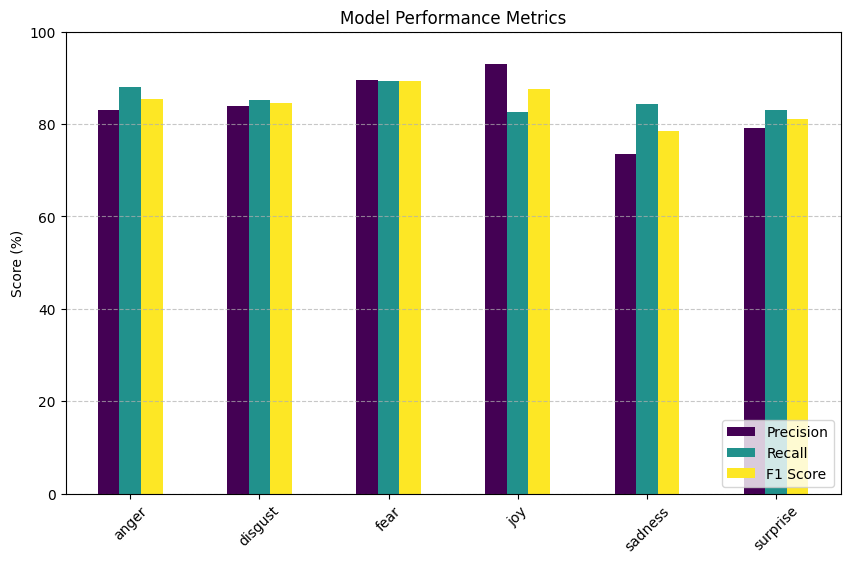

In [ ]:

# Generate classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average=None)
labels = label_encoder.classes_  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


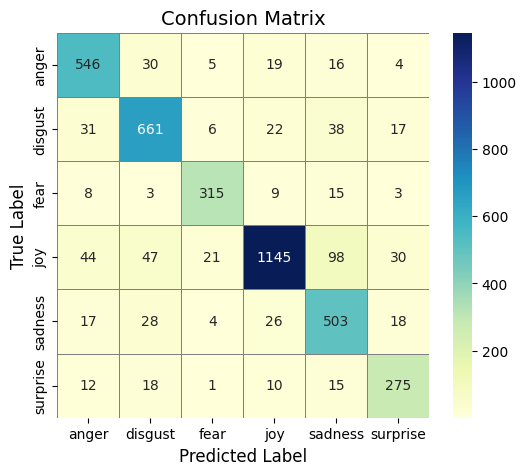

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Convert numerical labels to emotion labels
emotion_labels = label_encoder.classes_

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with emotion labels
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5,
            linecolor='gray', xticklabels=emotion_labels, yticklabels=emotion_labels)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Show plot
plt.show()

**Bi-LSTM**

In [ ]:
#Bi-LSTM
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

# Tokenization
tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data["Text"])
tokenizer.fit_on_texts(df_train["Text"])

# Convert text to sequences
# X_train = tokenizer.texts_to_sequences(train_data["Text"])
X_train = tokenizer.texts_to_sequences(df_train["Text"])
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_val = tokenizer.texts_to_sequences(df_val["Text"])

# Padding
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')

# Label Encoding
label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(train_data["Label"])
y_train = label_encoder.fit_transform(df_train["Label"])
y_test = label_encoder.transform(df_test["Label"])
y_val = label_encoder.transform(df_val["Label"])

# Define Bi-LSTM Model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping Function
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)


# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32,callbacks=[early_stopping] )

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")



Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.2783 - loss: 1.6867 - val_accuracy: 0.5288 - val_loss: 1.2262
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5335 - loss: 1.2594 - val_accuracy: 0.7457 - val_loss: 0.7042
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.7222 - loss: 0.7919 - val_accuracy: 0.9229 - val_loss: 0.2993
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8530 - loss: 0.4817 - val_accuracy: 0.9664 - val_loss: 0.1245
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9184 - loss: 0.2889 - val_accuracy: 0.9810 - val_loss: 0.0728
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9449 - loss: 0.1966 - val_accuracy: 0.9872 - val_loss: 0.0514
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9617 - loss: 0.1428 - val_accuracy: 0.9911 - val_loss: 0.0317
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9695 - loss: 0.1113 - 

127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
              precision    recall  f1-score     support
anger          0.826546  0.883871  0.854248   620.00000
disgust        0.821066  0.834839  0.827895   775.00000
fear           0.858726  0.878187  0.868347   353.00000
joy            0.908243  0.843321  0.874579  1385.00000
sadness        0.764610  0.790268  0.777228   596.00000
surprise       0.777457  0.812689  0.794682   331.00000
accuracy       0.840640  0.840640  0.840640     0.84064
macro avg      0.826108  0.840529  0.832830  4060.00000
weighted avg   0.843073  0.840640  0.841216  4060.00000
   Category  Precision     Recall   F1 Score
0     anger  82.654600  88.387097  85.424786
1   disgust  82.106599  83.483871  82.789507
2      fear  85.872576  87.818697  86.834734
3       joy  90.824261  84.332130  87.457881
4   sadness  76.461039  79.026846  77.722772
5  surprise  77.745665  81.268882  79.468242


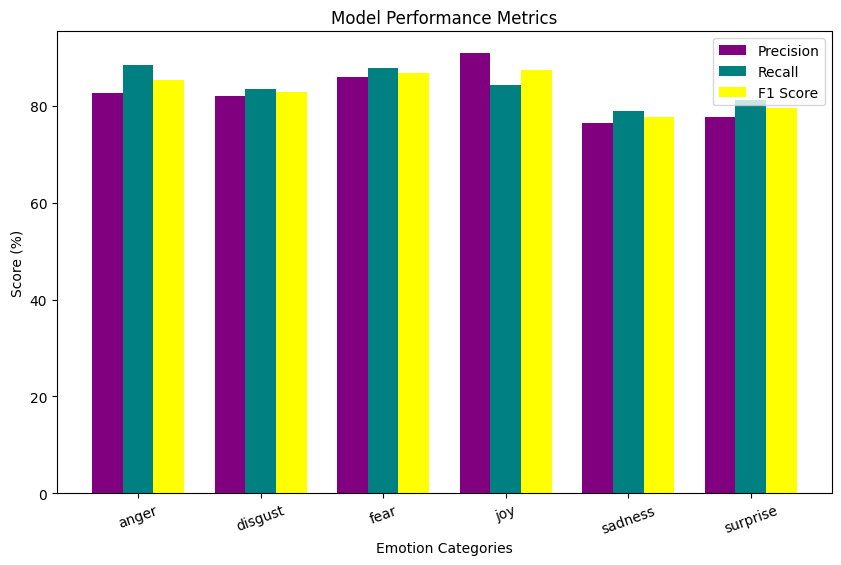

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert report to DataFrame
performance_df = pd.DataFrame(report).transpose()
print(performance_df)

# Extract relevant metrics for plotting
categories = label_encoder.classes_
precision = [report[label]['precision'] * 100 for label in categories]
recall = [report[label]['recall'] * 100 for label in categories]
f1_score = [report[label]['f1-score'] * 100 for label in categories]

# Create performance table similar to your screenshot
performance_table = pd.DataFrame({
    'Category': categories,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})
print(performance_table)

# Plot bar chart
bar_width = 0.25
x_indexes = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x_indexes, precision, width=bar_width, label='Precision', color='purple')
plt.bar(x_indexes + bar_width, recall, width=bar_width, label='Recall', color='teal')
plt.bar(x_indexes + 2 * bar_width, f1_score, width=bar_width, label='F1 Score', color='yellow')

# Formatting the plot
plt.xlabel('Emotion Categories')
plt.ylabel('Score (%)')
plt.title('Model Performance Metrics')
plt.xticks(ticks=x_indexes + bar_width, labels=categories, rotation=20)
plt.legend()
plt.show()


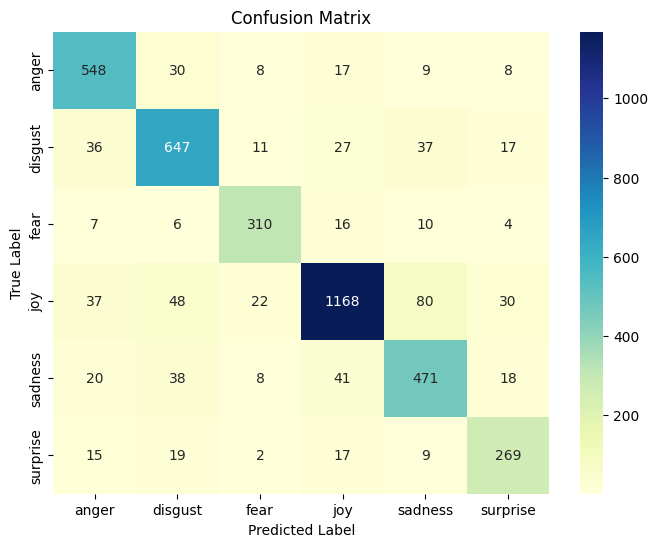

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Bi-GRU**

In [ ]:
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
# Tokenization
tokenizer = Tokenizer()
# tokenizer.fit_on_texts(train_data["Text"])
tokenizer.fit_on_texts(df_train["Text"])
# Convert text to sequences
# X_train = tokenizer.texts_to_sequences(train_data["Text"])
X_train = tokenizer.texts_to_sequences(df_train["Text"])
X_test = tokenizer.texts_to_sequences(df_test["Text"])
X_val = tokenizer.texts_to_sequences(df_val["Text"])
# Padding
max_len = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
X_val = pad_sequences(X_val, maxlen=max_len, padding='post')
# Label Encoding
label_encoder = LabelEncoder()
# y_train = label_encoder.fit_transform(train_data["Label"])
y_train = label_encoder.fit_transform(df_train["Label"])
y_test = label_encoder.transform(df_test["Label"])
y_val = label_encoder.transform(df_val["Label"])
# implement gru

from tensorflow.keras.layers import GRU

# Define GRU Model
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
# Early Stopping Function

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop training if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    Bidirectional(GRU(128, return_sequences=True)),  # Using GRU layer
    Dropout(0.5),
    Bidirectional(GRU(64)),  # Using GRU layer
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32,callbacks=[early_stopping])

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.2726 - loss: 1.6863 - val_accuracy: 0.5273 - val_loss: 1.1809
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.5277 - loss: 1.2173 - val_accuracy: 0.8302 - val_loss: 0.5694
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.7592 - loss: 0.7043 - val_accuracy: 0.9414 - val_loss: 0.2456
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.8861 - loss: 0.3901 - val_accuracy: 0.9760 - val_loss: 0.1022
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9318 - loss: 0.2424 - val_accuracy: 0.9770 - val_loss: 0.0744
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9564 - loss: 0.1605 - val_accuracy: 0.9921 - val_loss: 0.0309
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9708 - loss: 0.1146 - val_accuracy: 0.9926 - val_loss: 0.0285
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9729 - loss: 0.0981 - 

127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
              precision    recall  f1-score      support
anger          0.827744  0.875806  0.851097   620.000000
disgust        0.864865  0.825806  0.844884   775.000000
fear           0.872222  0.889518  0.880785   353.000000
joy            0.932886  0.802888  0.863019  1385.000000
sadness        0.680593  0.847315  0.754858   596.000000
surprise       0.729730  0.815710  0.770328   331.000000
accuracy       0.833498  0.833498  0.833498     0.833498
macro avg      0.818007  0.842841  0.827495  4060.000000
weighted avg   0.844972  0.833498  0.835847  4060.000000
   Category  Precision     Recall   F1 Score
0     anger  82.774390  87.580645  85.109718
1   disgust  86.486486  82.580645  84.488449
2      fear  87.222222  88.951841  88.078541
3       joy  93.288591  80.288809  86.301901
4   sadness  68.059299  84.731544  75.485800
5  surprise  72.972973  81.570997  77.032810


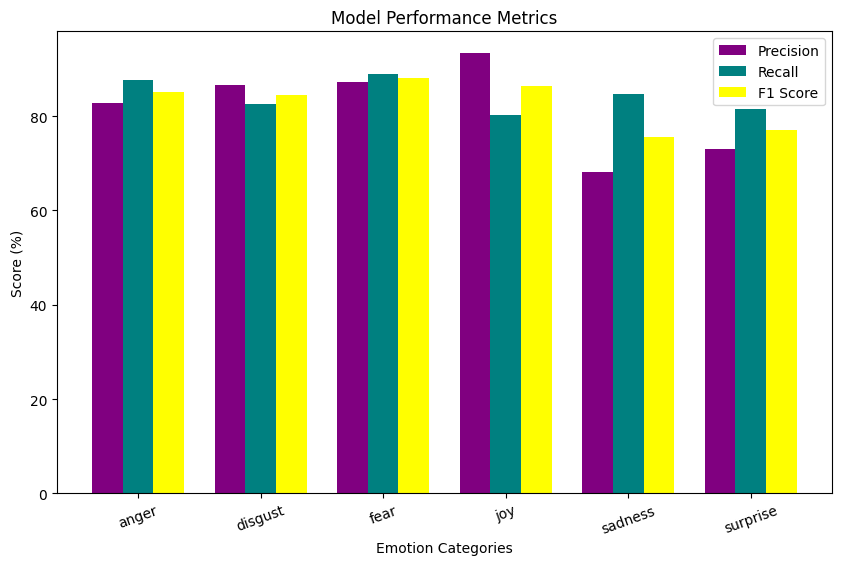

In [ ]:

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)

# Convert report to DataFrame
performance_df = pd.DataFrame(report).transpose()
print(performance_df)

# Extract relevant metrics for plotting
categories = label_encoder.classes_
precision = [report[label]['precision'] * 100 for label in categories]
recall = [report[label]['recall'] * 100 for label in categories]
f1_score = [report[label]['f1-score'] * 100 for label in categories]

# Create performance table similar to your screenshot
performance_table = pd.DataFrame({
    'Category': categories,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})
print(performance_table)

# Plot bar chart
bar_width = 0.25
x_indexes = np.arange(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x_indexes, precision, width=bar_width, label='Precision', color='purple')
plt.bar(x_indexes + bar_width, recall, width=bar_width, label='Recall', color='teal')
plt.bar(x_indexes + 2 * bar_width, f1_score, width=bar_width, label='F1 Score', color='yellow')

# Formatting the plot
plt.xlabel('Emotion Categories')
plt.ylabel('Score (%)')
plt.title('Model Performance Metrics')
plt.xticks(ticks=x_indexes + bar_width, labels=categories, rotation=20)
plt.legend()
plt.show()


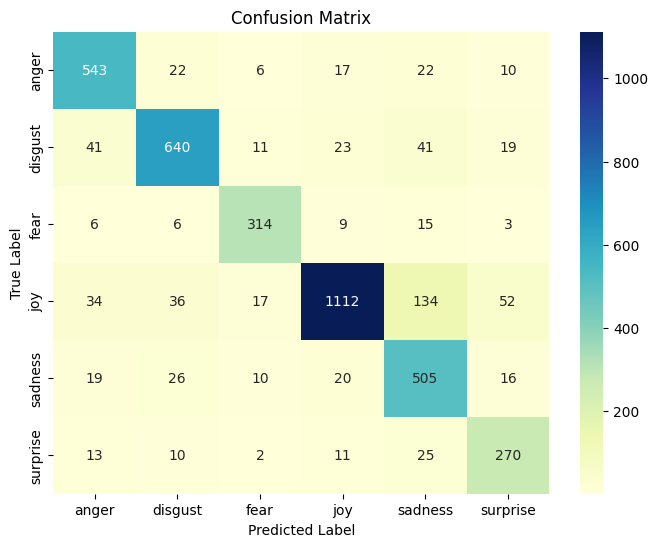

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**CNN With Bangla Glove**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df_train['Text'])

# Convert texts to sequences
df_train['text_sequences'] = tokenizer.texts_to_sequences(df_train['Text'])
df_test['text_sequences'] = tokenizer.texts_to_sequences(df_test['Text'])
df_val['text_sequences'] = tokenizer.texts_to_sequences(df_val['Text'])

# Padding
max_length = 100
df_train['padded_sequences'] = list(pad_sequences(df_train['text_sequences'], maxlen=max_length, padding='post'))
df_test['padded_sequences'] = list(pad_sequences(df_test['text_sequences'], maxlen=max_length, padding='post'))
df_val['padded_sequences'] = list(pad_sequences(df_val['text_sequences'], maxlen=max_length, padding='post'))

# Label Encoding
label_encoder = LabelEncoder()
df_train['label_encoded'] = label_encoder.fit_transform(df_train['Label'])
df_test['label_encoded'] = label_encoder.transform(df_test['Label'])
df_val['label_encoded'] = label_encoder.transform(df_val['Label'])

num_classes = len(label_encoder.classes_)

y_train = to_categorical(df_train['label_encoded'], num_classes=num_classes)
y_test = to_categorical(df_test['label_encoded'], num_classes=num_classes)
y_val = to_categorical(df_val['label_encoded'], num_classes=num_classes)

# Convert to NumPy arrays
X_train = np.array(df_train['padded_sequences'].tolist())
X_test = np.array(df_test['padded_sequences'].tolist())
X_val = np.array(df_val['padded_sequences'].tolist())


vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128



num_tokens = vocab_size
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

from bnlp import BengaliGlove

# Load Bengali GloVe model
bengali_glove = BengaliGlove()

# Get the embedding dimension automatically
sample_word = "ভালো"
embedding_vector = bengali_glove.get_word_vector(sample_word)
embedding_dim = embedding_vector.shape[0]  # Get correct dimension (should be 100)

print(f"Detected embedding dimension: {embedding_dim}")

# Initialize embeddings dictionary
embeddings_index = {word: bengali_glove.get_word_vector(word) for word in bengali_glove.embedding_dict.keys()}

print(f"Found {len(embeddings_index)} Bengali word vectors.")

# Define vocabulary size
num_tokens = vocab_size  # Ensure vocabSize is defined based on your tokenizer

# Initialize embedding matrix with correct dimension
embedding_matrix = np.zeros((num_tokens, embedding_dim))

hits, misses = 0, 0

# Assign word vectors to vocabulary
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None and embedding_vector.shape[0] == embedding_dim:
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print(f"Converted {hits} words ({misses} misses)")


#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)


Detected embedding dimension: 100
Found 178153 Bengali word vectors.
Converted 14266 words (11098 misses)


**CNN Model With Fine-tuning**

In [ ]:
# CNN Model with Fine-tuning
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix]),
    Conv1D(filters=256, kernel_size=5, activation='relu'),  # Increased filters
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile with learning rate tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Fine-tuned learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,  # Increased epochs for better training
    batch_size=32,
    verbose=1,
     callbacks=[callback]
)

# Evaluate on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate F1-score table
report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_, output_dict=True)
f1_df = pd.DataFrame(report).transpose()
print(f1_df)


# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.2656 - loss: 1.7304 - val_accuracy: 0.4757 - val_loss: 1.3884
Epoch 2/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4431 - loss: 1.4157 - val_accuracy: 0.6353 - val_loss: 1.1044
Epoch 3/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5498 - loss: 1.1980 - val_accuracy: 0.7976 - val_loss: 0.7845
Epoch 4/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6657 - loss: 0.9347 - val_accuracy: 0.9036 - val_loss: 0.4674
Epoch 5/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7754 - loss: 0.6743 - val_accuracy: 0.9666 - val_loss: 0.2389
Epoch 6/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.4397 - val_accuracy: 0.9894 - val_loss: 0.0914
Epoch 7/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9292 - loss: 0.2500 - val_accuracy: 0.9946 - val_loss: 0.0504
Epoch 8/15
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9604 - loss: 0.1641 - val_accuracy: 0.

              precision    recall  f1-score   support

       anger       0.78      0.89      0.83       620
     disgust       0.88      0.84      0.86       775
        fear       0.88      0.90      0.89       353
         joy       0.92      0.85      0.88      1385
     sadness       0.79      0.83      0.81       596
    surprise       0.78      0.82      0.80       331

    accuracy                           0.85      4060
   macro avg       0.84      0.85      0.84      4060
weighted avg       0.86      0.85      0.85      4060

          Precision     Recall   F1 Score
anger     78.205128  88.548387  83.055976
disgust   87.601078  83.870968  85.695452
fear      87.811634  89.801700  88.795518
joy       91.777604  84.620939  88.054095
sadness   78.571429  83.053691  80.750408
surprise  78.160920  82.175227  80.117820


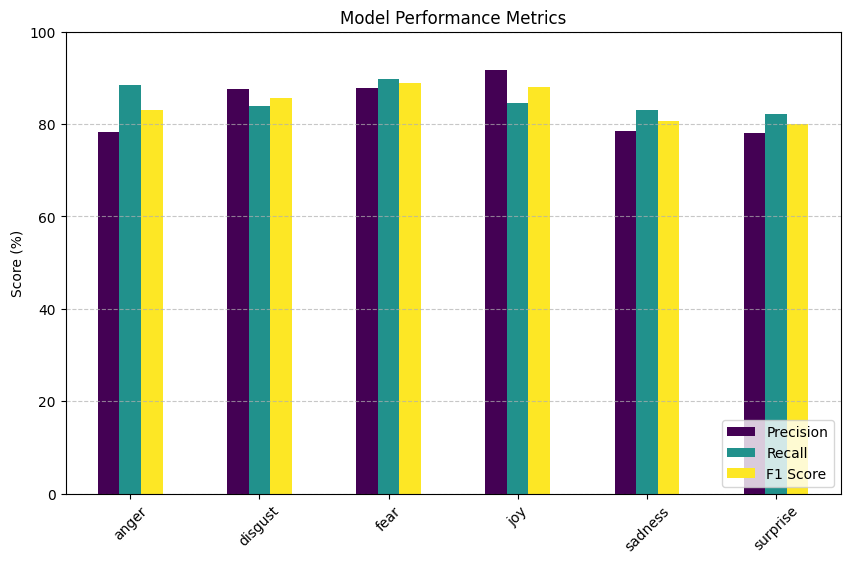

In [ ]:

# Generate classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Compute precision, recall, f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, average=None)
labels = label_encoder.classes_  # Ensure correct label order

# Convert to DataFrame
metrics_df = pd.DataFrame({'Precision': precision * 100, 'Recall': recall * 100, 'F1 Score': f1_score * 100}, index=labels)

# Check if DataFrame is populated
print(metrics_df)

# Plot Performance Table (F1 Score, Recall, Precision)
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar', colormap='viridis', ax=plt.gca())  # Use `ax=plt.gca()` for correct rendering
plt.ylim(0, 100)  # Ensure bars are visible
plt.title("Model Performance Metrics")
plt.ylabel("Score (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


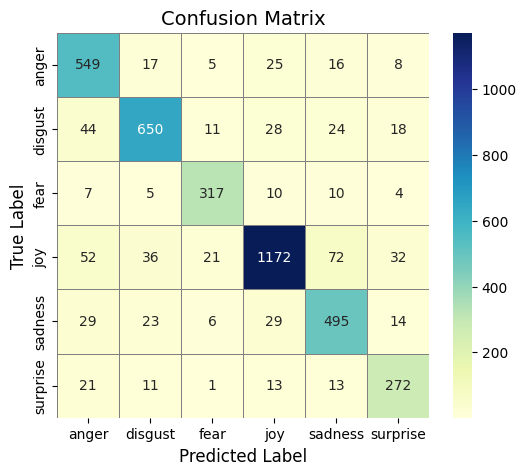

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Convert numerical labels to emotion labels
emotion_labels = label_encoder.classes_

# Set figure size
plt.figure(figsize=(6, 5))

# Plot confusion matrix with emotion labels
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5,
            linecolor='gray', xticklabels=emotion_labels, yticklabels=emotion_labels)

# Labels and title
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Show plot
plt.show()